# Text Classification:


### Model-1: Using 1D convolutions with word embeddings

### Model-2 : Using 1D convolutions with character embedding

In [1]:
import os
import re
from tqdm import tqdm
import nltk
import pandas as pd
import numpy as np
import keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing import text, sequence

In [394]:
path = "C://Users//Hp//Downloads//documents//documents"
dir_list = os.listdir(path)
Y=[]
for i in dir_list:
    a=i.split('_')
    Y.append(a[0])    
print(len(Y))

18828


In [396]:
input_text=[]
for i in dir_list:
    string="C://Users//Hp//Downloads//documents//documents//"+ i
    open_files=open(string, 'r')
    read_file = open_files.read() 
    input_text.append(read_file)

In [397]:
def preprocess(Input_Text):
    a=[]
    emails = re.findall(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", Input_Text)
    email=[]
    for j in range(len(emails)):
        e=[]
        z=re.sub(r'.*@','', emails[j])
        z=re.sub(r'\-','.',z)
        z=re.sub(r'\_','.',z)
        z=re.sub(r"[0-9]+","",z)
        d=z.split('.')
        for k in d:
            if k!='com':
                if len(k)>2:
                    e.append(k)
            d=' '.join(e)
            d=d.lower()
        email.append(d)
    email=' '.join(email)
    
    sub = re.findall(r"Subject\:.+",Input_Text)
    sub=' '.join(sub)
    sub=re.sub(r".+\:\s",'',sub)
    sub=re.sub(r"[^a-zA-Z0-9\s]","",sub)
    sub=re.sub(r"\n","",sub)
    sub=re.sub(r"\t","",sub)
    sub=re.sub(r"[0-9]+","",sub)
    sub=re.sub(r"\b\w{1,2}\b","",sub)
    sub=re.sub(r"\b\w{15,}\b","",sub)
    sub=sub.lower()
    subject=re.sub(r"\s\s"," ",sub)
    
    x=re.sub(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+","",Input_Text)
    x=re.sub(r"Subject\:.+",'',x)
    x=re.sub(r"Write\sto\:","",x)
    x=re.sub(r"From\:.+","",x)
    x=re.sub(r".+\:","",x)
    x=re.sub(r"\<.\>","",x)
    x=re.sub(r"\(.\)"," ",x)
    x=re.sub(r"\n"," ",x)
    x=re.sub(r'\"',"",x)
    x=re.sub(r"\t"," ",x)
    x=re.sub(r"\-"," ",x)
    x=re.sub(r"\\"," ",x)
    x=re.sub(r".\:"," ",x)
    x=re.sub(r"can\'t","can not",x)
    x=re.sub(r"couldn\'t","could not",x)
    x=re.sub(r"wasn\'t","was not",x)
    x=re.sub(r"weren\'t","were not",x)
    x=re.sub(r"aren\'t","are not",x)
    x=re.sub(r"isn\'t","is not",x)
    x=re.sub(r"hasn\'t","has not",x)
    x=re.sub(r"haven\'t","have not",x)
    x=re.sub(r"(d|D)on\'t","do not",x)
    x=re.sub(r"(d|D)oesn\'t","does not",x)
    x=re.sub(r"\'s"," is",x)
    x=re.sub(r"(i|I)\'ve","i have",x)
    x=re.sub(r"(i|I)\'m","i am",x)
    x=re.sub(r"(y|Y)ou\'re","you are",x)
    x=re.sub(r"(i|I)\'ll","i will",x)
    x=re.sub(r"[0-9]+","",x)
    text=re.sub(r"(y|Y)ou\'ll","you will",x)

    tokens = nltk.tokenize.word_tokenize(text)
    parse_tree = nltk.ne_chunk(nltk.tag.pos_tag(tokens), binary=True)  # POS tagging before chunking!
    for t in parse_tree.subtrees():
        #if t.label() == 'NNP':
         #   words = [w for w, t in t.leaves()]
          #  print(words)
          #  if len(words)>1:
          #      a=' '.join(words)
          #      #print(a)
          #      b='_'.join(words)
          #      #print(b)
          #      text=re.sub(a,b,text)
        if t.label() == 'NE':
            words = [w for w, t in t.leaves()]
            words=str(' '.join(words))
            text=re.sub(words,"",text)
    
    text=re.sub(r"[0-9]","",text)
    text=re.sub(r"\b\w{1,2}\b","",text)
    text=re.sub(r"\b\w{15,}\b","",text)
    text=re.sub(r"(\b\_|\_\b)","",text)
    text=re.sub(r"[A-Za-z]{1,2}\_","",text)
    text=re.sub(r"A-Za-z_","",text)
    text=text.lower()
    text=re.sub(r"\w{15,}","",text)
    text=re.sub(r"[^A-Za-z_]"," ",text)
    text=re.sub(r"\s{2,}"," ",text)
    text=text.strip()
    x=(text,subject,email)
    """Do all the Preprocessing as shown above and
    return a tuple contain preprocess_email,preprocess_subject,preprocess_text for that Text_data"""
    return (x)

In [398]:
string='C://Users//Hp//Downloads//documents//documents//alt.atheism_51238.txt'
open_files=open(string, 'r')
read_file = open_files.read() 
test=preprocess(read_file)
print(read_file)
print(list(test))

From: keith@cco.caltech.edu (Keith Allan Schneider)
Subject: Re: >>>>>>Pompous ass

<MVS104@psuvm.psu.edu> writes:

>>Many people would probably think (especially if the fanatics propogandized
>>this) that this was a conflict between the atheists and the religious.
>>Many would get the impression that we were trying to outlaw religion, if
>>we contintue to try to remove all things with a religious reference.
>That's not what the people I've asked think. Perhaps you would be right
>if you said the fundamentalists would think this way; after all, they think
>they are being oppressed when they are not allowed to oppress. However,
>you have not shown where you get this idea that 'many' people would
>'probably' think it's atheism vs. religion, winner take all. As far as I can
>tell, it is your groundless prediction that this will happen.

But you haven't taken into the account of propoganda.  Remember, if you
asked Germans before WWII if the Jews shoudl be slaughtered, they would
probably a

In [399]:
list_inp=[]
for i in tqdm(input_text):
    in_txt=preprocess(i)
    list_inp.append(in_txt)
df=pd.DataFrame(list_inp,columns=["preprocessed_text", "preprocessed_subject", "preprocessed_emails"])
df.head()

100%|████████████████████████████████████████████████████████████████████████████| 18828/18828 [37:19<00:00,  8.41it/s]


,preprocessed_text,preprocessed_subject,preprocessed_emails
0,atheism resources resources december atheist r...,atheist resources,mantis netcom mantis
1,atheism introduction introduction april signed...,introduction atheism,mantis mantis mantis
2,article well has quite different not necessari...,gospel dating,dbstu mimsy umd edu umd edu
3,recently have been ordered and none have resis...,university violating separation churchstate,mantis kepler unh edu
4,however hate economic terrorism and political ...,socmotss princeton axes matching funds for bo...,harder ccr ida org harder ccr ida org watson ibm


In [400]:
df1=pd.DataFrame(columns=['text_data'],index=None)
df1['text_data']=df['preprocessed_text'] + ' ' + df['preprocessed_subject'] + ' ' + df['preprocessed_emails']

In [401]:
Y=pd.DataFrame(Y,columns=['class'],index=None)

In [402]:
Y['class'][14156]

'sci.space'

In [151]:
df['preprocessed_emails']

0                                     mantis netcom mantis
1                                     mantis mantis mantis
2                              dbstu mimsy umd edu umd edu
3                                    mantis kepler unh edu
4         harder ccr ida org harder ccr ida org watson ibm
                               ...                        
18823                 fraser sfu magnus acs ohio state edu
18824    ifi uio ifi uio noose ecn purdue edu bank ecn ...
18825              quack kfu emx utexas edu emx utexas edu
18826                  digi lonestar org digi lonestar org
18827                         quack kfu okcforum osrhe edu
Name: preprocessed_emails, Length: 18828, dtype: object

In [403]:
df1.to_csv('text_data')
Y.to_csv('class_labels',index=None)

In [404]:
Y=Y['class']

In [405]:
Y

0               alt.atheism
1               alt.atheism
2               alt.atheism
3               alt.atheism
4               alt.atheism
                ...        
18823    talk.religion.misc
18824    talk.religion.misc
18825    talk.religion.misc
18826    talk.religion.misc
18827    talk.religion.misc
Name: class, Length: 18828, dtype: object

In [2]:
df1=pd.read_csv('text_data')
Y=pd.read_csv('class_labels')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df1, Y, test_size=0.25, random_state=52, stratify=Y)

In [407]:
X_train[:8]

,text_data
13838,the has both the prototype and the film when w...
16178,have just finished reading and have several qu...
10217,the other hand hard pressed think any other re...
635,just has this part gotten beyond useful not un...
12640,have friend who has just been diagnosed with a...
17541,now that can get mail wondering also going lin...
11998,greetings have phone jack mounted wall not kno...
4968,there call give application context fixing mot...


In [408]:
print("95 percentile length = {}".format(X_train.text_data.map(lambda x: len(x)).quantile(q=0.95)))
print("90 percentile length = {}".format(X_train.text_data.map(lambda x: len(x)).quantile(q=0.9)))
print("85 percentile length = {}".format(X_train.text_data.map(lambda x: len(x)).quantile(q=0.85)))
print("Mean length = {}".format(X_train.text_data.map(lambda x: len(x)).mean()))
print("Median length = {}".format(X_train.text_data.map(lambda x: len(x)).median()))
print("Min length = {}".format(X_train.text_data.map(lambda x: len(x)).min()))
print("Max length = {}".format(X_train.text_data.map(lambda x: len(x)).max()))

95 percentile length = 3208.0
90 percentile length = 2059.0
85 percentile length = 1610.0
Mean length = 1126.2904893421146
Median length = 645.0
Min length = 6
Max length = 54422


In [132]:
X_train.head()

,text_data
13838,the has both the prototype and the film when w...
16178,have just finished reading and have several qu...
10217,the other hand hard pressed think any other re...
635,just has this part gotten beyond useful not un...
12640,have friend who has just been diagnosed with a...


In [409]:
X_train = X_train.astype({"text_data": 'string'})
X_test = X_test.astype({"text_data": 'string'})

In [134]:
toknzr=tf.keras.preprocessing.text.Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')

In [135]:
toknzr.fit_on_texts(
    X_train['text_data']
)

In [136]:
X_tr1=toknzr.texts_to_sequences(X_train['text_data'])
X_te1=toknzr.texts_to_sequences(X_test['text_data'])

In [137]:
X_tr=tf.keras.preprocessing.sequence.pad_sequences(X_tr1,maxlen=2064,truncating='post',dtype='int32',padding='post',value=0)
X_te=tf.keras.preprocessing.sequence.pad_sequences(X_te1,maxlen=2064,truncating='post',dtype='int32',padding='post',value=0)

In [109]:
len(X_te[3])

500

In [138]:
X_train=pd.DataFrame(data=X_tr)
X_test=pd.DataFrame(data=X_te)               

In [139]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063
0,1,24,120,1,6804,2,1,2913,35,12,...,0,0,0,0,0,0,0,0,0,0
1,7,36,2671,453,2,7,274,346,23,1,...,0,0,0,0,0,0,0,0,0,0
2,1,40,352,221,4779,49,26,40,201,3248,...,0,0,0,0,0,0,0,0,0,0
3,36,24,9,160,1595,1057,775,4,344,47,...,0,0,0,0,0,0,0,0,0,0
4,7,629,27,24,36,48,4845,10,2,39,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14116,34217,4208,11,19617,831,6,44,39,22,3,...,0,0,0,0,0,0,0,0,0,0
14117,805,18,458,1,2587,380,15,179,3324,790,...,0,0,0,0,0,0,0,0,0,0
14118,374,74852,74853,74854,74855,43168,20,72,6,7754,...,0,0,0,0,0,0,0,0,0,0
14119,74863,3398,966,7012,117,117,42344,3398,966,821,...,0,0,0,0,0,0,0,0,0,0


In [140]:
y_train_enc=pd.get_dummies(y_train)
ytr=y_train_enc.values.tolist()
y_train=pd.DataFrame(data=ytr)
y_test_enc=pd.get_dummies(y_test)
yte=y_test_enc.values.tolist()
y_test=pd.DataFrame(data=yte)  

In [90]:
y_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4702,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4703,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4704,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4705,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
from keras.callbacks import Callback
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
import datetime

In [59]:
class Metrics(tf.keras.callbacks.Callback):
  def __init__(self):
    self.validation_data=(X_test2,y_test2)
  def on_train_begin(self, logs={}):
    self.val_f1_scores = []   
  def on_epoch_end(self, epoch, logs={}):
     val_predict = (np.asarray(self.model.predict(self.validation_data[0])))
     val_targ = self.validation_data[1]
     val_f1 = f1_score(val_targ, val_predict.round(),average='micro')
     self.val_f1_scores.append(val_f1)  
     print("-f1 score :",val_f1)

In [60]:
class TerminateNaN(tf.keras.callbacks.Callback):
        
    def on_epoch_end(self, epoch, logs={}):
        loss = logs.get('loss')
        if loss is not None:
            if np.isnan(loss) or np.isinf(loss):
                print("Invalid loss and terminated at epoch {}".format(epoch))
                self.model.stop_training = True
        model_weights = self.model.get_weights()
        if model_weights is not None:
            if np.any([np.any(np.isnan(x)) for x in model_weights]):
              print("Invalid weight and terminated at epoch {}".format(epoch))
              self.model.stop_training = True

In [61]:
filepath="best_model_2.h5"
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.9, patience=1, min_lr=0.0001)
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',  verbose=1, save_best_only=True, mode='auto')
earlystop = EarlyStopping(monitor='val_accuracy',verbose=1,baseline=0.7)
terminate= TerminateNaN()   
metrics=Metrics()
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [ ]:
import numpy as np
from tqdm import tqdm 
def load_glove_model(File):
    print("Loading Glove Model")
    glove_model = {}
    with open(File,'r',encoding="utf-8") as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array(split_line[1:])
            glove_model[word] = embedding
    print(f"{len(glove_model)} words loaded!")
    return glove_model

gloveModel=load_glove_model(r'C:\Users\Hp\Downloads\glove.840B.300d.txt')

In [ ]:
vocab_size=len(toknzr.word_index) + 1
embedding_matrix=np.zeros((vocab_size,300))
for word, i in toknzr.word_index.items():
    embedding_vector=gloveModel[word]
    if embedding_vector is not None:
        v=v+1
        embedding_matrix[i]=embedding_vector

In [116]:
vocab_size=len(toknzr.word_index) + 1
v=0
import pickle
with open("glove.840B.300d.pkl",'rb') as f:
    glove_dict=pickle.load(f)
    embeddings_index=set(glove_dict.keys())
embedding_matrix=np.zeros((vocab_size,300))
for word, i in toknzr.word_index.items():
    embedding_vector=glove_dict.get(word)
    if embedding_vector is not None:
        v=v+1
        embedding_matrix[i]=embedding_vector

In [117]:
v

54621

In [107]:
print('Got embeddings for {}% words of the total vocabulary'.format((v*100)//vocab_size))

Got embeddings for 72% words of the total vocabulary


In [ ]:
(toknzr.word_index)[0]

In [72]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.27204001, -0.06203   , -0.1884    , ...,  0.13015001,
        -0.18317001,  0.1323    ],
       [-0.18567   ,  0.066008  , -0.25209001, ..., -0.023452  ,
         0.12302   ,  0.3312    ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.34349999, -0.55214   ,  0.05924   , ...,  0.32907   ,
         0.38473001, -0.30542001]])

In [33]:
len(toknzr.word_index.items())

75948

In [38]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import initializers

input_layer = Input(shape=(2064))

embd=tf.keras.layers.Embedding(vocab_size,300,
                               weights=[embedding_matrix],
                               input_length=2064,trainable=True)(input_layer)

#embd=tf.keras.layers.Embedding(vocab_size,300,
#                               input_length=500,trainable=True,embeddings_initializer='random_normal')(input_layer)

n11=tf.keras.layers.Conv1D(64,3,strides=2,padding="same",activation='relu',kernel_initializer='he_normal', 
                           kernel_regularizer=regularizers.L2(0.01))(embd)
n12=tf.keras.layers.Conv1D(128,3,strides=2,padding="same",activation='relu',kernel_initializer='he_normal',
                           kernel_regularizer=regularizers.L2(l=0.01))(embd)
n13=tf.keras.layers.Conv1D(256,3,strides=2,padding="same",activation='relu', kernel_initializer='he_normal',
                           kernel_regularizer=regularizers.L2(l=0.01))(embd)

c1=tf.keras.layers.Concatenate(axis=2)([n11,n12,n13])

mp1=tf.keras.layers.MaxPooling1D(pool_size=2, strides=None, padding="valid", data_format="channels_last")(c1)

n21=tf.keras.layers.Conv1D(64,3,strides=2,padding="same",activation='relu',kernel_initializer='he_normal',
                           kernel_regularizer=regularizers.L2(l=0.01))(mp1)
n22=tf.keras.layers.Conv1D(128,3,strides=2,padding="same",activation='relu',kernel_initializer='he_normal',
                           kernel_regularizer=regularizers.L2(l=0.01))(mp1)
n23=tf.keras.layers.Conv1D(256,3,strides=2,padding="same",activation='relu',kernel_initializer='he_normal',
                           kernel_regularizer=regularizers.L2(l=0.01))(mp1)

c2=tf.keras.layers.Concatenate(axis=2)([n21,n22,n23])

mp2=tf.keras.layers.MaxPooling1D(pool_size=2, strides=None, padding="valid", data_format="channels_last")(c2)

n3=tf.keras.layers.Conv1D(64,3,strides=2,padding="same",activation='relu',kernel_initializer='he_normal',
                           kernel_regularizer=regularizers.L2(l=0.01))(mp2)

f=tf.keras.layers.Flatten()(n3)

dr1=tf.keras.layers.Dropout(0.5)(f)

de1=tf.keras.layers.Dense(256,activation='relu')(dr1)

dr2=tf.keras.layers.Dropout(0.4)(de1)

de2=tf.keras.layers.Dense(128,activation='relu')(dr2)

output_layer=tf.keras.layers.Dense(20,activation='softmax')(de2)


##Defining the model by specifying the input and output layers
model = Model(inputs=input_layer, outputs=output_layer)


## defining the optimiser and loss function
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 2064)]       0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 2064, 300)    23033100    ['input_5[0][0]']                
                                                                                                  
 conv1d_7 (Conv1D)              (None, 1032, 64)     57664       ['embedding_4[0][0]']            
                                                                                                  
 conv1d_8 (Conv1D)              (None, 1032, 128)    115328      ['embedding_4[0][0]']            
                                                                                            

In [34]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063
0,117,22960,13506,8461,3774,373,22961,13506,8461,3774,...,0,0,0,0,0,0,0,0,0,0
1,2709,7,596,3120,16,613,230,1979,7001,725,...,0,0,0,0,0,0,0,0,0,0
2,19,24,48,28,543,1,7241,2,7564,23,...,0,0,0,0,0,0,0,0,0,0
3,743,149,1307,80,15,1518,2,20673,1505,904,...,0,0,0,0,0,0,0,0,0,0
4,6,8,79,1738,1253,20,72,636,874,12336,...,0,0,0,0,0,0,0,0,0,0


In [80]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063
0,1,24,120,1,6838,2,1,2925,35,12,...,0,0,0,0,0,0,0,0,0,0
1,7,36,2686,454,2,7,274,347,23,1,...,0,0,0,0,0,0,0,0,0,0
2,1,40,352,223,4806,49,26,40,200,3261,...,0,0,0,0,0,0,0,0,0,0
3,36,24,9,157,1603,1054,776,4,344,47,...,0,0,0,0,0,0,0,0,0,0
4,7,630,27,24,36,48,4873,10,2,39,...,0,0,0,0,0,0,0,0,0,0


In [45]:
y_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [36]:
y_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [40]:
## training the model
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test,y_test),
          callbacks=[metrics,checkpoint,terminate,tensorboard_callback])

Epoch 1/10
148/148 [==============================] - 118s 788ms/step
-f1 score : 0.003373392367699768

Epoch 1: val_accuracy improved from -inf to 0.15318, saving model to best_model_1.h5
111/111 [==============================] - 1587s 14s/step - loss: 7.2560 - accuracy: 0.1073 - val_loss: 2.6732 - val_accuracy: 0.1532
Epoch 2/10
148/148 [==============================] - 110s 743ms/step
-f1 score : 0.15531795160382666

Epoch 2: val_accuracy improved from 0.15318 to 0.33461, saving model to best_model_1.h5
111/111 [==============================] - 1655s 15s/step - loss: 2.2835 - accuracy: 0.2447 - val_loss: 2.0222 - val_accuracy: 0.3346
Epoch 3/10
148/148 [==============================] - 107s 725ms/step
-f1 score : 0.26632124352331604

Epoch 3: val_accuracy improved from 0.33461 to 0.43637, saving model to best_model_1.h5
111/111 [==============================] - 1535s 14s/step - loss: 1.8131 - accuracy: 0.4000 - val_loss: 1.7433 - val_accuracy: 0.4364
Epoch 4/10
148/148 [=======

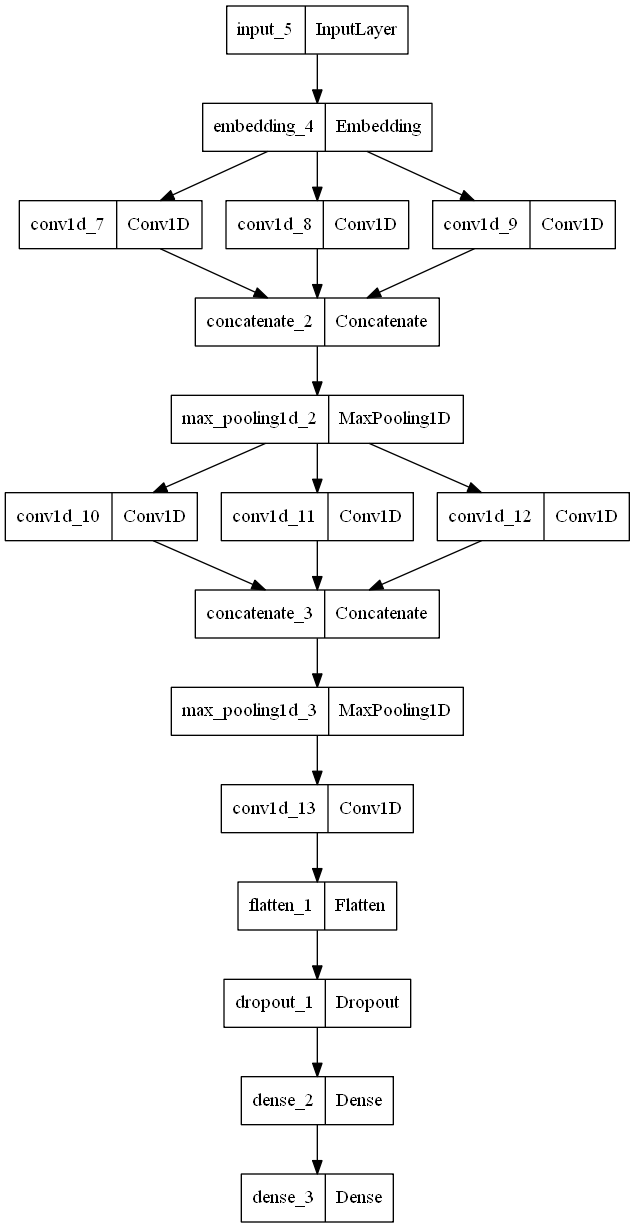

In [64]:
plot_model(
    model, to_file='model_1.png', show_shapes=False, show_layer_names=True, 
    rankdir='TB', expand_nested=False, dpi=96
)

In [4]:
import numpy as np
from tqdm import tqdm 
def load_char_embedding(File):
    char_model = {}
    with open(File,'r',encoding="utf-8") as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array(split_line[1:])
            char_model[word] = embedding
    print(f"{len(char_model)} chars loaded!")
    return char_model

char_embedding=load_char_embedding(r"C:\Users\Hp\Downloads\glove.840B.300d-char.txt")

94 chars loaded!


In [5]:
len(char_embedding)

94

In [6]:
toknzr1=tf.keras.preprocessing.text.Tokenizer(char_level=True,filters='!"#$%&()*+,-. /:;\s<=>?@[\\]^`{|}~\t\n')

In [7]:
toknzr1.fit_on_texts(
    X_train['text_data']
)

In [8]:
X_tr2=toknzr1.texts_to_sequences(X_train['text_data'])
X_te2=toknzr1.texts_to_sequences(X_test['text_data'])

In [21]:
np.shape(X_tr2)

(14121,)

In [28]:
len(X_te3[7])

1600

In [24]:
toknzr1.word_index.items()

dict_items([(' ', 1), ('e', 2), ('t', 3), ('a', 4), ('o', 5), ('n', 6), ('i', 7), ('s', 8), ('r', 9), ('h', 10), ('l', 11), ('d', 12), ('c', 13), ('u', 14), ('m', 15), ('p', 16), ('g', 17), ('y', 18), ('w', 19), ('f', 20), ('b', 21), ('v', 22), ('k', 23), ('x', 24), ('j', 25), ('q', 26), ('z', 27), ('_', 28)])

In [25]:
len(X_tr2[5000])

232

In [26]:
X_tr3=tf.keras.preprocessing.sequence.pad_sequences(X_tr2,maxlen=1600,truncating='post',dtype='int32',padding='post',value=0)
X_te3=tf.keras.preprocessing.sequence.pad_sequences(X_te2,maxlen=1600,truncating='post',dtype='int32',padding='post',value=0)

In [29]:
X_train2=pd.DataFrame(data=X_tr3)
X_test2=pd.DataFrame(data=X_te3)      

In [31]:
np.shape(X_te3)

(4707, 1600)

In [494]:
char_embedding.keys()

dict_keys(['$', '(', ',', '0', '4', '8', '<', '@', 'D', 'H', 'L', 'P', 'T', 'X', '\\', '`', 'd', 'h', 'l', 'p', 't', 'x', '|', '#', "'", '+', '/', '3', '7', ';', '?', 'C', 'G', 'K', 'O', 'S', 'W', '[', '_', 'c', 'g', 'k', 'o', 's', 'w', '{', '"', '&', '*', '.', '2', '6', ':', '>', 'B', 'F', 'J', 'N', 'R', 'V', 'Z', '^', 'b', 'f', 'j', 'n', 'r', 'v', 'z', '~', '!', '%', ')', '-', '1', '5', '9', '=', 'A', 'E', 'I', 'M', 'Q', 'U', 'Y', ']', 'a', 'e', 'i', 'm', 'q', 'u', 'y', '}'])

In [32]:
vocab_size1=len(toknzr1.word_index)+1
v=0
#embeddings_index=set(char_embedding.keys())
embedding_matrix1=np.zeros((vocab_size1,300))
for char, i in toknzr1.word_index.items():
    if char!=' ':
        embedding_vector1=char_embedding[char]
        if embedding_vector1 is not None:
            v=v+1
            embedding_matrix1[i]=embedding_vector1

In [36]:
np.shape(embedding_matrix1)

(29, 300)

In [72]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras import regularizers
from tensorflow.keras import initializers

input_layer = Input(shape=(1600))

embd=tf.keras.layers.Embedding(vocab_size1,300,
                               weights=[embedding_matrix1],
                               input_length=1600,trainable=False)(input_layer)

n11=tf.keras.layers.Conv1D(64,3,strides=2,padding="same",activation='relu',kernel_initializer='he_normal', 
                           kernel_regularizer=regularizers.L2(0.01))(embd)

n12=tf.keras.layers.Conv1D(128,3,strides=2,padding="same",activation='relu',kernel_initializer='he_normal',
                           kernel_regularizer=regularizers.L2(l=0.01))(n11)

mp1=tf.keras.layers.MaxPooling1D(pool_size=2, strides=None, padding="same", data_format="channels_last")(n12)

n21=tf.keras.layers.Conv1D(64,3,strides=2,padding="same",activation='relu',kernel_initializer='he_normal',
                           kernel_regularizer=regularizers.L2(l=0.01))(mp1)

n22=tf.keras.layers.Conv1D(128,3,strides=2,padding="same",activation='relu',kernel_initializer='he_normal',
                           kernel_regularizer=regularizers.L2(l=0.01))(n21)

mp2=tf.keras.layers.MaxPooling1D(pool_size=2, strides=None, padding="same", data_format="channels_last")(n22)

f=tf.keras.layers.Flatten()(mp2)

dr1=tf.keras.layers.Dropout(0.5)(f)

de1=tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_normal',
                           kernel_regularizer=regularizers.L2(l=0.01))(dr1)

output_layer=tf.keras.layers.Dense(20,activation='softmax')(de1)


##Defining the model by specifying the input and output layers
model2 = Model(inputs=input_layer, outputs=output_layer)


## defining the optimiser and loss function
opt = keras.optimizers.Adam(learning_rate=0.1)
model2.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [73]:
model2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1600)]            0         
                                                                 
 embedding_5 (Embedding)     (None, 1600, 300)         8700      
                                                                 
 conv1d_16 (Conv1D)          (None, 800, 64)           57664     
                                                                 
 conv1d_17 (Conv1D)          (None, 400, 128)          24704     
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 200, 128)         0         
 1D)                                                             
                                                                 
 conv1d_18 (Conv1D)          (None, 100, 64)           24640     
                                                           

In [50]:
y_train_enc=pd.get_dummies(y_train)
ytr=y_train_enc.values.tolist()
y_train2=pd.DataFrame(data=ytr)
y_test_enc=pd.get_dummies(y_test)
yte=y_test_enc.values.tolist()
y_test2=pd.DataFrame(data=yte)  

In [502]:
X_test2

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,4,9,3,7,13,11,2,1,13,20,...,7,6,3,5,6,8,1,7,15,15
1,10,2,11,11,5,1,10,4,22,2,...,0,0,0,0,0,0,0,0,0,0
2,3,10,2,9,2,1,10,4,8,1,...,5,6,4,8,10,1,2,12,14,1
3,13,5,15,16,1,19,7,6,12,5,...,0,0,0,0,0,0,0,0,0,0
4,18,5,14,1,4,9,2,1,9,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4702,9,2,13,4,11,11,1,9,2,4,...,0,0,0,0,0,0,0,0,0,0
4703,3,10,7,8,1,15,4,18,1,8,...,0,0,0,0,0,0,0,0,0,0
4704,11,4,8,3,1,6,7,17,10,3,...,0,0,0,0,0,0,0,0,0,0
4705,10,4,22,2,1,21,2,2,6,1,...,0,0,0,0,0,0,0,0,0,0


In [435]:
y_test2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14116,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14117,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
14119,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [506]:
keras.backend.clear_session()

In [514]:
X_test2

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,4,9,3,7,13,11,2,1,13,20,...,7,6,3,5,6,8,1,7,15,15
1,10,2,11,11,5,1,10,4,22,2,...,0,0,0,0,0,0,0,0,0,0
2,3,10,2,9,2,1,10,4,8,1,...,5,6,4,8,10,1,2,12,14,1
3,13,5,15,16,1,19,7,6,12,5,...,0,0,0,0,0,0,0,0,0,0
4,18,5,14,1,4,9,2,1,9,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4702,9,2,13,4,11,11,1,9,2,4,...,0,0,0,0,0,0,0,0,0,0
4703,3,10,7,8,1,15,4,18,1,8,...,0,0,0,0,0,0,0,0,0,0
4704,11,4,8,3,1,6,7,17,10,3,...,0,0,0,0,0,0,0,0,0,0
4705,10,4,22,2,1,21,2,2,6,1,...,0,0,0,0,0,0,0,0,0,0


In [71]:
model2.fit(X_train2, y_train2, epochs=6, validation_data=(X_test2,y_test2),
          callbacks=[metrics,checkpoint,terminate,tensorboard_callback])

Epoch 1/6
148/148 [==============================] - 16s 105ms/step
-f1 score : 0.0

Epoch 1: val_accuracy did not improve from 0.08349
442/442 [==============================] - 193s 438ms/step - loss: 2.9481 - accuracy: 0.0823 - val_loss: 2.9481 - val_accuracy: 0.0803
Epoch 2/6
148/148 [==============================] - 16s 110ms/step
-f1 score : 0.0

Epoch 2: val_accuracy improved from 0.08349 to 0.08434, saving model to best_model_2.h5
442/442 [==============================] - 188s 425ms/step - loss: 2.9459 - accuracy: 0.0820 - val_loss: 2.9445 - val_accuracy: 0.0843
Epoch 3/6
148/148 [==============================] - 16s 105ms/step
-f1 score : 0.0

Epoch 3: val_accuracy did not improve from 0.08434
442/442 [==============================] - 181s 409ms/step - loss: 2.9450 - accuracy: 0.0843 - val_loss: 2.9432 - val_accuracy: 0.0841
Epoch 4/6
148/148 [==============================] - 18s 120ms/step
-f1 score : 0.0

Epoch 4: val_accuracy improved from 0.08434 to 0.08732, saving mo

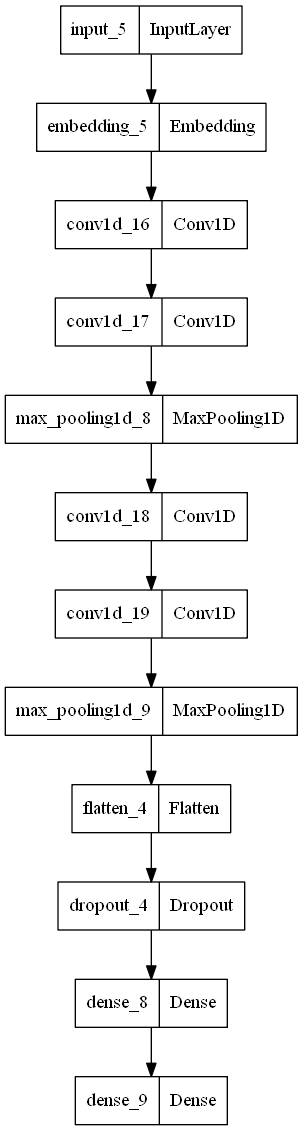

In [77]:
from tensorflow.keras.utils import plot_model
plot_model(
    model2, to_file='model_2.png', show_shapes=False, show_layer_names=True, 
    rankdir='TB', expand_nested=False, dpi=96
)